In [1]:
%cd ..

/home/ivanstefanov/Repositories/used-cars-price-prediction


In [2]:
%load_ext autoreload
%autoreload 2

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
%matplotlib inline

In [4]:
from price_predictor.data_preparation.feature_engineering import add_class_feature
from price_predictor.data_preparation.pick_or_drop_features import (
    pick_by_datatypes,
    drop_anonymous_features,
    drop_categorical_features
)

In [40]:
data = pd.read_csv('data/cars.csv')
data.dropna(inplace=True)

In [41]:
df = add_class_feature(data)

df = drop_anonymous_features(df)
#df = drop_categorical_features(df)

/home/ivanstefanov/Repositories/used-cars-price-prediction


In [39]:
df = pd.get_dummies(df)
df

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,...,drivetrain_rear,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.,class_high-end,class_low-end,class_mid-end
0,190000,2010,False,2.5,False,10900.00,False,9,13,16,...,0,0,0,0,0,1,0,0,0,1
1,290000,2002,False,3.0,False,5000.00,True,12,54,83,...,0,0,0,0,0,1,0,0,0,1
2,402000,2001,False,2.5,False,2800.00,True,4,72,151,...,0,0,0,0,0,1,0,0,0,1
3,10000,1999,False,3.0,False,9999.00,True,9,42,86,...,0,0,0,0,0,1,0,0,0,1
4,280000,2001,False,2.5,False,2134.11,True,14,7,7,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,False,3.5,False,2750.00,True,5,85,301,...,0,0,0,0,0,1,0,0,0,1
38527,321000,2004,False,2.2,False,4800.00,True,4,20,317,...,0,1,0,0,0,0,0,0,0,1
38528,777957,2000,False,3.5,False,4300.00,False,3,63,369,...,0,0,0,0,0,1,0,0,0,1
38529,20000,2001,False,2.0,False,4000.00,True,7,156,490,...,0,1,0,0,0,0,0,0,0,1


## Exploration

<AxesSubplot: >

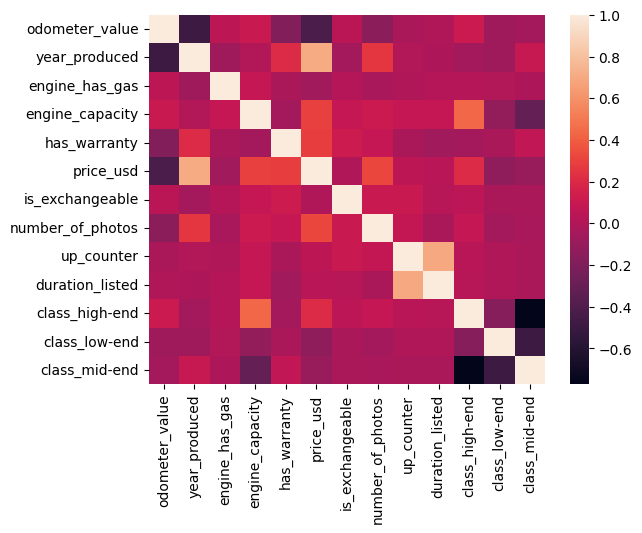

In [9]:
sns.heatmap(df.corr())

In [27]:
high_end = df[df['class_high-end'] == 1]
high_end

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,class_high-end,class_low-end,class_mid-end
437,104000,2012,False,1.4,False,10500.00,False,39,250,384,1,0,0
438,220000,2003,True,2.4,False,2371.23,False,4,1,0,1,0,0
439,170000,2017,False,3.6,False,27000.00,False,10,9,31,1,0,0
440,234567,2003,False,2.4,False,3250.00,True,5,4,3,1,0,0
441,402336,2001,True,3.3,False,4000.00,False,8,88,231,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36207,290000,2006,False,2.2,False,6400.00,False,6,1,96,1,0,0
36208,367000,1994,False,1.8,False,1000.00,False,6,2,138,1,0,0
36209,620000,2000,False,2.9,False,5100.00,False,6,1,117,1,0,0
36210,250000,1987,False,2.6,False,1430.00,True,3,1,119,1,0,0


In [28]:
mid_end = df[df['class_mid-end'] == 1]
mid_end

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,class_high-end,class_low-end,class_mid-end
0,190000,2010,False,2.5,False,10900.00,False,9,13,16,0,0,1
1,290000,2002,False,3.0,False,5000.00,True,12,54,83,0,0,1
2,402000,2001,False,2.5,False,2800.00,True,4,72,151,0,0,1
3,10000,1999,False,3.0,False,9999.00,True,9,42,86,0,0,1
4,280000,2001,False,2.5,False,2134.11,True,14,7,7,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,False,3.5,False,2750.00,True,5,85,301,0,0,1
38527,321000,2004,False,2.2,False,4800.00,True,4,20,317,0,0,1
38528,777957,2000,False,3.5,False,4300.00,False,3,63,369,0,0,1
38529,20000,2001,False,2.0,False,4000.00,True,7,156,490,0,0,1


In [29]:
low_end= df[df['class_low-end'] == 1]
low_end

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,class_high-end,class_low-end,class_mid-end
291,64400,2017,False,1.6,False,8200.00,False,6,1,0,0,1,0
292,78932,2014,False,1.6,False,7066.30,False,14,1,0,0,1,0
293,46000,2018,False,1.6,False,10600.00,False,2,12,70,0,1,0
294,30500,2017,False,1.6,True,8900.00,False,9,3,6,0,1,0
295,35460,2018,False,1.8,False,11450.00,True,20,27,45,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38116,382000,2010,False,2.2,False,12000.00,True,10,28,390,0,1,0
38117,294342,2002,False,1.6,False,3400.00,False,11,1,81,0,1,0
38118,380000,1999,False,2.0,False,4742.47,False,3,1,84,0,1,0
38119,20000,1990,False,1.9,False,1100.00,False,10,1,92,0,1,0


<AxesSubplot: xlabel='price_usd'>

<Figure size 2400x1600 with 0 Axes>

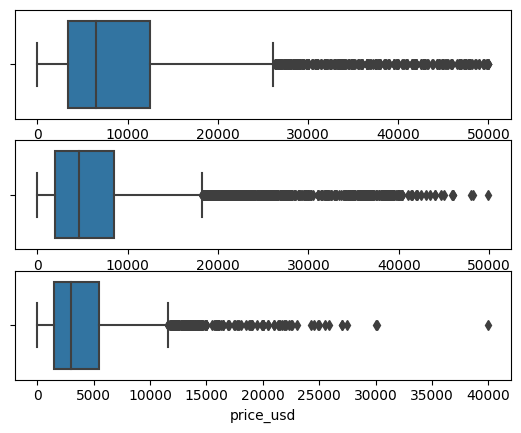

In [26]:
plt.figure(figsize=(24, 16))
fig, ax = plt.subplots(nrows=3)

sns.boxplot(data=high_end, x='price_usd', ax=ax[0])
sns.boxplot(data=mid_end, x='price_usd', ax=ax[1])
sns.boxplot(data=low_end, x='price_usd', ax=ax[2])


In [43]:
pd.set_option('display.max_columns', 50)

In [44]:
df[(df['class'] == 'low-end') & (df['price_usd'] > 20000)]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed,class
8136,Geely,Atlas,automatic,white,0,2019,gasoline,False,gasoline,1.8,suv,False,new,all,22479.37,False,Витебская обл.,5,20,143,low-end
8139,Geely,Atlas,automatic,silver,0,2019,gasoline,False,gasoline,2.4,suv,False,new,front,21388.60,False,Минская обл.,6,2,14,low-end
23271,ГАЗ,А21,mechanical,red,53000,2018,diesel,False,diesel,2.8,van,False,owned,rear,22289.67,False,Минская обл.,13,91,120,low-end
23312,ГАЗ,А22,mechanical,green,105000,1942,gasoline,False,gasoline,3.3,pickup,False,owned,rear,22011.76,False,Гродненская обл.,1,1,2,low-end
23318,ГАЗ,М20,mechanical,brown,45000,1960,gasoline,False,gasoline,2.1,sedan,False,owned,rear,27000.00,False,Минская обл.,22,9,178,low-end
23326,ГАЗ,24,mechanical,other,300,1978,gasoline,False,gasoline,2.4,sedan,False,owned,rear,25000.00,False,Витебская обл.,4,63,285,low-end
23382,ГАЗ,А22,mechanical,white,17000,2016,gasoline,False,gasoline,2.7,van,False,owned,rear,21341.17,False,Минская обл.,6,45,213,low-end
23450,ГАЗ,21,mechanical,black,8500,1965,gasoline,False,gasoline,2.4,sedan,False,owned,rear,30000.00,True,Минская обл.,5,5,88,low-end
31624,Iveco,Daily,mechanical,white,200000,2015,diesel,False,diesel,3.0,van,False,owned,rear,30114.76,False,Минская обл.,17,47,58,low-end
31628,Iveco,Daily,mechanical,yellow,394300,2013,diesel,False,diesel,3.0,van,False,owned,rear,22000.00,True,Минская обл.,15,2,1,low-end
